# Assignment
1. Klik pada file lalu pilih `save a copy in drive` untuk file Format Task Assignment.ipynb ini
2. Download dataset : https://drive.google.com/drive/folders/1FyigllyrhI-sAsjbPaLfwV7REwLqe_xt?usp=sharing
3. Data ini hanya terdiri dari dua kolom: Jam dan Skor. Regresi linear sangat efektif digunakan untuk memprediksi skor siswa berdasarkan jumlah jam belajar.
4. Lakukan hal berikut :
- Import dataset
- Exploratory Data Analysis : statistical summary untuk mengetahui rata-rata, median, mean dkk, lalu lakukan scatter plot.
- lakukan analisis lainnya semisal correlation heatmap (opsional)
- feature engineering (check duplikat data dan drop duplikat, check missing value, check outlier
- splitting data ke X_train,X_test,y_train,y_test
- lakukan regresi modelling memakai linear regression, decision tree atau random forest (gunakan minimal 2 model)
- pada model linear regression keluarkan nilai intercept dan coef, namun pada decision tree dan random forest tidak bisa mengeluarkan nilai intercept dan coef karena libraries nya tidak support.
- Plotting the actual and predicted values pada tiap model
- Keluarkan nilai R-Score untuk membandingkan 2 model yang anda gunakan dan berikan kesimpulan model terbaik dengan melihat R-Score tertinggi.

In [2]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import dataset

In [9]:
# read the dataset using pandas
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [13]:
data.value_counts()

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
Name: count, dtype: int64

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
#cek data duplikat pertama (tidak boleh terdapat data yang terduplikat, agar ML tidak menjadi error, karena ML hanya menerima inputan yang sejenis)
df = data.copy()
print(df.shape)
#cek data duplikat kedua (menyamakan cek data duplikat pertama, jika berbeda maka terdapat duplikat dan harus di cek kembali data yang tersedia)
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before
df = df.drop_duplicates()
print(df.shape)

(25, 2)
(25, 2)


In [20]:
#cek missing value (jika hasilnya 0, maka tidak terdapat missing value)
df.isna().sum()

Hours     0
Scores    0
dtype: int64

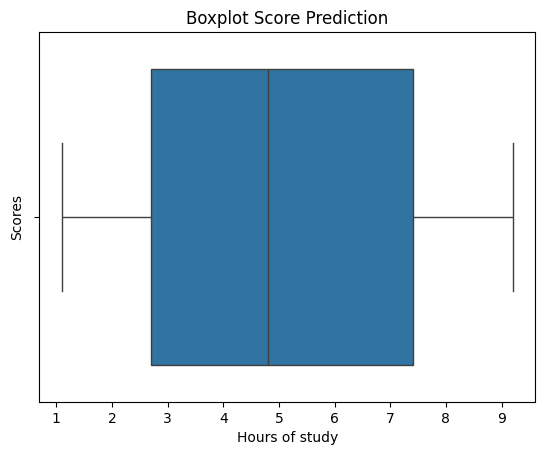

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.title("Boxplot Score Prediction")

# Menampilkan plot
plt.show()

#CEK IQR
#untuk mengecek apakah terdapat titik(outlier) pada LUAR bagian batas atas(garis kanan) dan batas bawah(garis kiri)

Splitting the Data (Data Splitting)

In [30]:
#pisahin data x dan y
x = data['Hours']
x.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [31]:
y = data['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [32]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.6 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:05
    --------------------------------------- 0.2/10.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/10.6 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.6 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/10.6 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.6 MB 2.0 MB/s eta 0:00:05
   --- --

In [33]:
from sklearn.model_selection import train_test_split

In [40]:
#split data ke dalam train dan test (ukuran data rasio=0.75)
#ukuran data rasio bisa menggunakan rasio 75:25 atau 70:30 atau 80:20 atau 85:15 (train:test), train_size > test_size
#random_state=42, agar stabil pada saat diacak ketika running train berulang kali
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=42)

Linear Regression (Machine Learning)

In [42]:
#menggunakan robot linear_regression
from sklearn.linear_model import LinearRegression

In [43]:
#buat sumbu baru untuk kolom x dalam array
#karena x nya hanya 1, maka menggunakan array, jika x nya lebih dari satu maka tidak perlu menggunakan array (langsung dari variable x_train,x_test,y_train,y_test)
x_train = np.array(x_train)[:, np.newaxis]
x_test = np.array(x_test)[:, np.newaxis]

In [47]:
#maka hasilnya seperti berikut
x_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [48]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

data yang diperlukan untuk diubah menjadi array hanya x saja (rules), maka data y tidak perlu dijadikan array

In [49]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

In [50]:
y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [57]:
#penyesuaian model menggunakan linear regression
#training linear regression model fit ke dalam data x_train dan y_train
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [61]:
#memprediksi dari data x_test dengan membuat variable baru yaitu y_pred
#terdapat 2 model prediksi
#y_pred = lr_model.predict(x_test) menggunakan data test sebagai prediksi, biasa digunakan untuk uts (belum pernah dikenali oleh ML atau LinearRegression)
#y_pred_train = lr_model.predict(x_train) menggunakan data train sebagai prediksi, biasa digunakan untuk ujian harian (sudah pernah dikenali)
y_pred = lr_model.predict(x_test)

In [65]:
#berikut adalah hasil prediksi
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

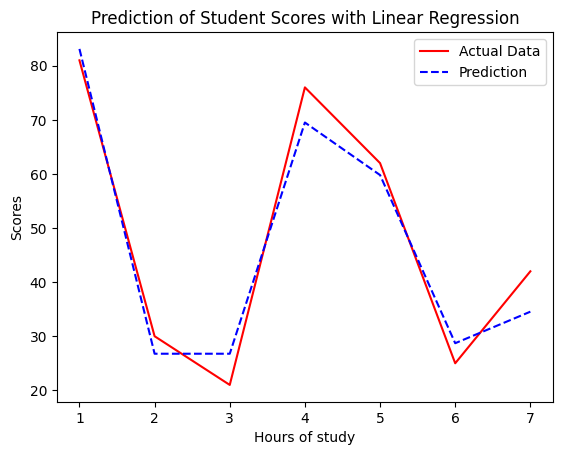

In [75]:
#seberapa cocok data prediksi diatas dengan data aktual(kunci jawaban)
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.title('Prediction of Student Scores with Linear Regression')
plt.legend()
plt.show()

In [82]:
#evaluasi model yang telah dibuat menggunakan model r2_score(mengetahui seberapa baik dan cocok performance) dan
#mean_squared_error(optional) untuk mengetahui seberapa jauh selisihnya atau erornya
from sklearn.metrics import r2_score

In [90]:
#simpan value r2_score nilai y_test dan y_pred dalam variable rsq untuk melihat performa dari y_test dengan y_pred
#atau untuk melihat perbandingan antara nilai prediksi dengan nilai kunci jawaban
rsq = r2_score(y_test,y_pred)
print('hasil dari r squared linear regression adalah:',rsq)

hasil dari r squared linear regression adalah: 0.9553509219739938


In [ ]:
#hasil dari evaluasi model yang telah dibuat menghasilkan nilai sebesar 95% atau 0,95
#jika mendekati 1, maka semakin valid

In [94]:
#hal selanjutnya adalah melakukan intercept dan koefisien pada garis
# y = m x + c    atau
# y = a x + b
# rumus diatas adalah rumus biasa karena hanya ada 2 variable, jika variable X lebih dari 1 maka rumus ini TIDAK dapat digunakan
# x = hours
# m & c adalah hasil koefisien atau konstanta gradien yang berasal dari ML
# m = intercept
# c = coef
# y = nilai yang akan diprediksi

print('Intersep dari Linear Regression Model adalah: ',lr_model.intercept_)
print('Koefisien dari Linear Regression Model adalah: ',lr_model.coef_)

Intersep dari Linear Regression Model adalah:  2.4803670915057623
Koefisien dari Linear Regression Model adalah:  [9.71409219]


In [96]:
#Maka dapat dikatakan suatu garis dengan hasil regresi linear sebagai berikut:

#y = 9.7 x + 2.48

#dengan x adalah 'hours of study'

DECISION TREE REGRESSOR menggunakan model ML seperti berikut:

1. Decision Tree (menggunakan sklearn.tree)
2. Random Forest

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [103]:
#prediksi kembali nilai x_test dan disimpan kedalam variable y_pred_dt
y_pred_dt = dt_model.predict(x_test)

In [101]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [104]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

In [105]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

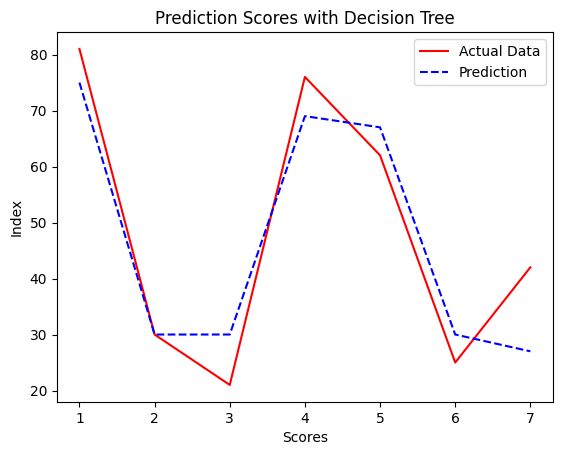

In [106]:
#bandingkan kembali nilainya dengan plotting
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('Index')
plt.title('Prediction Scores with Decision Tree')
plt.legend()
plt.show()

In [108]:
rsq_dt = r2_score(y_test,y_pred_dt)
print('Hasil dari r Square Decision Tree adalah:',rsq_dt)

Hasil dari r Square Decision Tree adalah: 0.8803859268443893
